In [350]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

import re    # for regular expressions 
import nltk  # for text manipulation 

In [351]:
df=pd.read_csv('train.csv')

In [352]:
df.head()   # 1 -racist , 0 -non-racist

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [354]:
df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [355]:
df.shape

(31962, 3)

Text(0, 0.5, '')

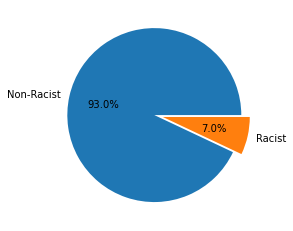

In [356]:
df['label'].value_counts().plot(kind='pie',autopct='%1.1f%%',labels=['Non-Racist','Racist'],explode=(0,0.1)) # 1 -racist , 0 -non-racist
plt.ylabel('')

## Text Preprocessing

In [357]:
def remove_twitter_handles(text):   #this function will remove twitter handles
    clean_text=re.sub('@[a-zA-Z0-9]*','',text)
    return clean_text.strip()

In [358]:
remove_twitter_handles('@ashu @ksnksns sfnfksjfnfef efberffber')

'sfnfksjfnfef efberffber'

In [359]:
df['tidy_tweet']=df['tweet'].apply(lambda x:remove_twitter_handles(x))

In [360]:
df.head()

,id,label,tweet,tidy_tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [361]:
df['tidy_tweet']=df['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")#it will remove everything except a-z characters and words with #

In [362]:
df['Length']=df['tidy_tweet'].apply(len)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F76ABFE6D0>,
      dtype=object)

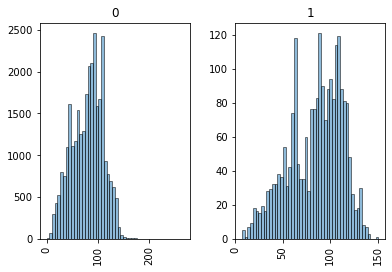

In [363]:
df.hist('Length',by='label',alpha=0.5,bins=50,grid=True,ec='black')

In [364]:
df.head()

,id,label,tweet,tidy_tweet,Length
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run,95
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked,110
2,3,0,bihday your majesty,bihday your majesty,19
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur,84
4,5,0,factsguide: society now #motivation,factsguide society now #motivation,38


In [365]:
'''def removing_stopwords(text):
    return [word for word in text.split() if word.lower() not in stopwords.words('English')]

    '''

"def removing_stopwords(text):\n    return [word for word in text.split() if word.lower() not in stopwords.words('English')]\n\n    "

In [366]:
#df['tidy_tweet']=df['tidy_tweet'].apply(lambda x:removing_stopwords(x))

In [367]:
import string
#print(string.punctuation)
#nltk.download_shell() to download stopwords

from nltk.corpus import stopwords
stopwords.words('English')


def text_process(text):
    clean_text=[ c for c in text if c not in string.punctuation]
    clean_text=''.join(clean_text)
    
    return [word for word in clean_text.split() if word.lower() not in stopwords.words('English')]


In [368]:
all_words = ' '.join([text for text in df['tidy_tweet']])

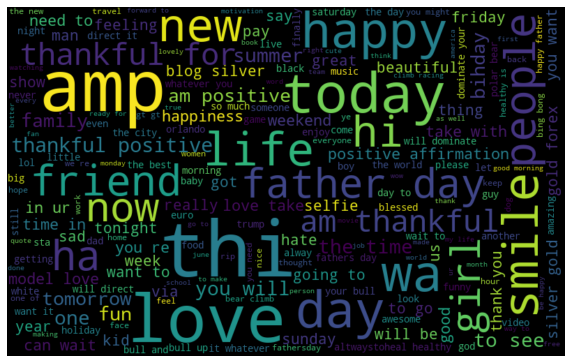

In [369]:
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

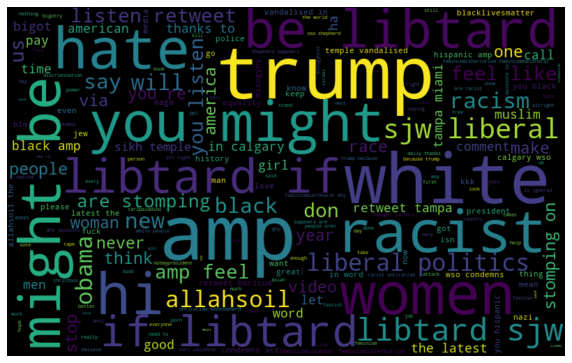

In [370]:
negative_words = ' '.join([text for text in df['tidy_tweet'][df['label'] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

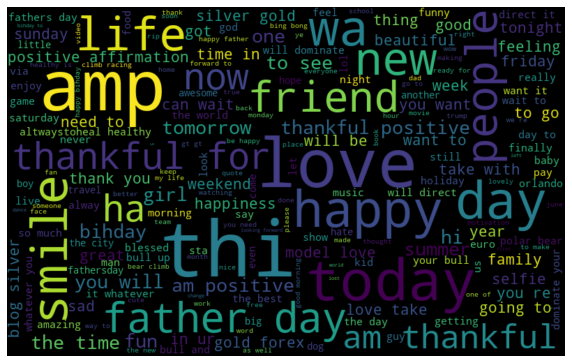

In [371]:
positive_words = ' '.join([text for text in df['tidy_tweet'][df['label'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

In [372]:
mess1=df['tidy_tweet'][0]
mess1

'when a father is dysfunctional and is so selfish he drags his kids into his dysfunction    #run'

In [373]:
# function to collect hashtags 
def hashtag_extract(x):
    hashtags = []    # Loop over the words in the tweet 
    for i in x:
        ht = re.findall("#(\w+)", i)
        hashtags.append(ht)
    return hashtags

In [374]:
hashtag=hashtag_extract(df['tidy_tweet'])
hashtag

[['run'],
 ['lyft', 'disapointed', 'getthanked'],
 [],
 ['model'],
 ['motivation'],
 ['allshowandnogo'],
 [],
 ['school',
  'exams',
  'hate',
  'imagine',
  'actorslife',
  'revolutionschool',
  'girl'],
 ['allin', 'cavs', 'champions', 'cleveland', 'clevelandcavaliers'],
 ['gr'],
 ['ireland', 'blog', 'silver', 'gold', 'forex'],
 ['orlando',
  'standwithorlando',
  'pulseshooting',
  'orlandoshooting',
  'biggerproblems',
  'selfish',
  'heabreaking',
  'values',
  'love'],
 ['gettingfed'],
 ['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphins',
  'thecove',
  'helpcovedolphins'],
 ['got', 'junior', 'yugyoem', 'omg'],
 ['thankful', 'positive'],
 [],
 ['friday', 'cookies'],
 [],
 ['euro'],
 ['badday', 'coneofshame', 'cats', 'pissed', 'funny', 'laughs'],
 ['wine', 'weekend'],
 [],
 ['tgif', 'ff', 'gamedev', 'indiedev', 'indiegamedev', 'squad'],
 ['upsideofflorida', 'shopalyssas', 'love'],
 ['smiles', 'media', 'pressconference', 'antalya', 'tu

In [375]:
# extracting hashtags from non racist/sexist tweets 
HT_regular = hashtag_extract(df['tidy_tweet'][df['label'] == 0]) 
# extracting hashtags from racist/sexist tweets 
HT_negative = hashtag_extract(df['tidy_tweet'][df['label'] == 1]) 
# unnesting list 
HT_regular = sum(HT_regular,[]) 
HT_negative = sum(HT_negative,[])

In [376]:
#print(HT_negative)

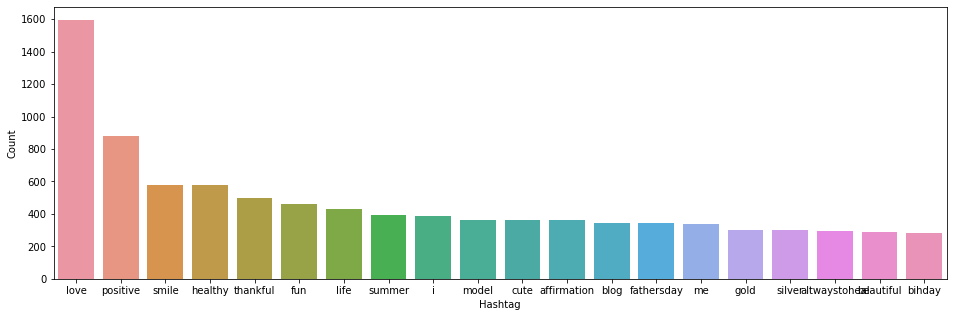

In [377]:
a = nltk.FreqDist(HT_regular) 
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())}) 
# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5)) 
ax = sns.barplot(data=d, x= "Hashtag", y = "Count") 
ax.set(ylabel = 'Count')
plt.show()

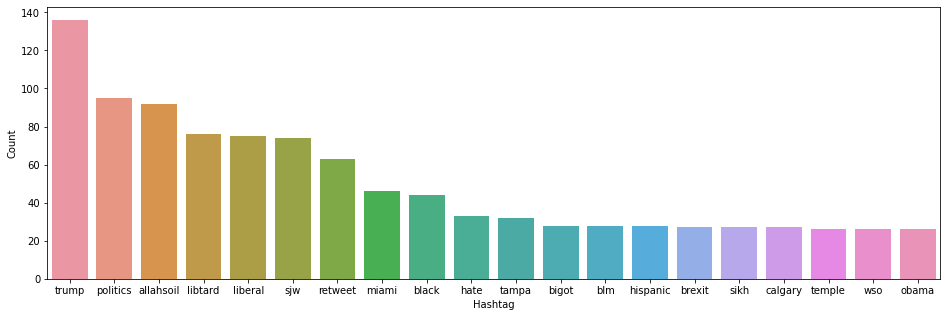

In [378]:
a = nltk.FreqDist(HT_negative) 
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())}) 
# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5)) 
ax = sns.barplot(data=d, x= "Hashtag", y = "Count") 
ax.set(ylabel = 'Count')
plt.show()

## Vectorization

In [379]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transform=CountVectorizer(analyzer=text_process).fit(df['tidy_tweet'])

In [380]:
mess4=df['tidy_tweet'][3]
mess4

'#model   i love u take with u all the time in ur                                    '

In [381]:
bow4=bow_transform.transform([mess4])  
print(bow4)

  (0, 19519)	1
  (0, 21384)	1
  (0, 32410)	1
  (0, 33524)	1
  (0, 34563)	2
  (0, 34985)	1


In [382]:
bow= bow_transform.fit_transform(df['tidy_tweet']) 
bow.shape

(31962, 37646)

In [383]:
bow.nnz 
print('Amount of Non-Zero occurences: ',bow.nnz)

Amount of Non-Zero occurences:  236109


In [384]:
sparsity = (100.0 *bow.nnz / (bow.shape[0] * bow.shape[1]))
print('sparsity: {}'.format(sparsity))  # getting sparsity by dividing non- zero occurences by total occurences

sparsity: 0.019622744845396167


## TF-IDF

In [385]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(bow)
messages_tfidf = tfidf_transformer.transform(bow)
print(messages_tfidf.shape)

(31962, 37646)


In [386]:
print(tfidf_transformer.idf_[bow_transform.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transform.vocabulary_['tak']])

4.73638770712247
9.986039901689226


In [387]:
tfidf4 = tfidf_transformer.transform(bow4) # checking tfidf for fourth message
print(tfidf4)

  (0, 34985)	0.37031006535976413
  (0, 34563)	0.6648076630157336
  (0, 33524)	0.30568856026018393
  (0, 32410)	0.34744529746924013
  (0, 21384)	0.3821635123593736
  (0, 19519)	0.24635045342462827


## Training a Model

In [402]:
from sklearn.naive_bayes import MultinomialNB
twitter_sentiment_model = MultinomialNB().fit(messages_tfidf, df['label'])

In [403]:
print('predicted:', twitter_sentiment_model.predict(tfidf4)[0])#checking 4th  message Prediction,tfidf4 is created above for 4th messages
print('expected:', df.label[3])

predicted: 0
expected: 0


In [404]:
all_predictions = twitter_sentiment_model.predict(messages_tfidf)
print(all_predictions)

[0 0 0 ... 0 1 0]


In [405]:
from sklearn.metrics import classification_report
print (classification_report(df['label'], all_predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     29720
           1       1.00      0.24      0.38      2242

    accuracy                           0.95     31962
   macro avg       0.97      0.62      0.68     31962
weighted avg       0.95      0.95      0.93     31962



In the above "evaluation",we evaluated accuracy on the same data we used for training. **You should never actually evaluate on the same dataset you train on!**

Such evaluation tells us nothing about the true predictive power of our model. If we simply remembered each example during training, the accuracy on training data would trivially be 100%, even though we wouldn't be able to classify any new messages.

A proper way is to split the data into a training/test set, where the model only ever sees the **training data** during its model fitting and parameter tuning. The **test data** is never used in any way. This is then our final evaluation on test data is representative of true predictive performance.


## Train Test Split

In [406]:
df1=pd.read_csv('test.csv')

In [407]:
df1.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite"
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦"


In [394]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB())  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [412]:
pipeline.fit(df['tidy_tweet'], df['label'])

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001F76AEC4280>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [413]:
all_test_pred=pipeline.predict(df1['tweet'])

In [415]:
df1['all_test_pred']=all_test_pred

In [419]:
df1.head(200)

,id,tweet,all_test_pred
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦,0
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why,0
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!,0
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite",0
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦",0
...,...,...,...
195,32158,can #lighttherapy help with or #depression? #altwaystoheal #healthy is #happy !!,0
196,32159,aww yeah it's all good bing bong bing bong,0
197,32160,selfie srelfie! #smile #me #selfie #followme #f4f #polishgirl #polskadziewczyna,0
198,32161,how vera rubin overcame and invented a whole field of #scientific #study #diversityinscience #science #steam,0


In [420]:
df1.to_csv('final_prediction')